In [3]:
import ROOT
import ctypes

import numpy as np
# import rootnotes

In [4]:
ROOT.gROOT.LoadMacro('/home/jykim/workspace/DRAW_and_FITTING/main/Belle2Style.C')
ROOT.SetBelle2Style()


Applying BELLE2 style settings...


# Generation of dummy data

In [5]:
data_raw = np.random.normal(size=10000)

In [6]:
tree = ROOT.TNtuple("ntuple", "ntuple", "var1")
for d in data_raw:
    tree.Fill(d)

In [7]:

var1 = ROOT.RooRealVar('var1', 'var1', -5, 5)
varset = ROOT.RooArgSet(var1)
data = ROOT.RooDataSet("data", "data", varset, ROOT.RooFit.Import(tree))
data_hist = ROOT.RooDataHist("data_hist", "data_hist", varset, data)
hist_pdf = ROOT.RooHistPdf("hist_pdf", "hist_pdf", varset, data_hist)

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(var1) TTree Float_t branch var1 will be converted to double precision.


In [8]:

all_smeared = []
mem = []  # to be sure object are not destroied
SMEARING_VALUES = (0.2, 1, 1.5, 2)
COLORS = [ROOT.kOrange + 2, ROOT.kMagenta - 2, ROOT.kYellow + 2, ROOT.kGreen + 2, ROOT.kPink]
for smearing_value in SMEARING_VALUES:
    smearing_var = ROOT.RooRealVar('smearing_value_%.2f' % smearing_value, 'smearing_value', smearing_value)
    smearing = ROOT.RooGaussian("smearing_%.2f" % smearing_value, "smearing", var1, ROOT.RooFit.RooConst(0), smearing_var)
    smeared = ROOT.RooFFTConvPdf("smeared_%.2f" % smearing_value, "smeared %.2f" % smearing_value, var1, hist_pdf, smearing)
    all_smeared.append(smeared)
    mem.append(smearing_var)
    mem.append(smearing)

[#0] WARNING:InputArguments -- The parameter 'smearing_value_0.20' with range [-1e+30, 1e+30] of the RooGaussian 'smearing_0.20' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Caching -- Changing internal binning of variable 'var1' in FFT 'smeared_0.20' from 100 to 930 to improve the precision of the numerical FFT. This can be done manually by setting an additional binning named 'cache'.
[#0] WARNING:InputArguments -- The parameter 'smearing_value_1.00' with range [-1e+30, 1e+30] of the RooGaussian 'smearing_1.00' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'smearing_value_1.50' with range [-1e+30, 1e+30] of the RooGaussian 'smearing_1.50' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'smearing_value_2.00' with range [-1e+30, 1e+30] of the RooGaussian 'smearing_2.00' exceeds the safe range of (0, inf). Advise to limit its range.


[#1] INFO:Caching -- RooAbsCachedPdf::getCache(smeared_0.20) creating new cache 0x55e29a845d30 with pdf hist_pdf_CONV_smearing_0.20_CACHE_Obs[var1]_NORM_var1 for nset (var1) with code 0 from preexisting content.
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(smeared_1.00) creating new cache 0x55e29a845d30 with pdf hist_pdf_CONV_smearing_1.00_CACHE_Obs[var1]_NORM_var1 for nset (var1) with code 0 from preexisting content.
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(smeared_1.50) creating new cache 0x55e29a845d30 with pdf hist_pdf_CONV_smearing_1.50_CACHE_Obs[var1]_NORM_var1 for nset (var1) with code 0 from preexisting content.
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(smeared_2.00) creating new cache 0x55e29a845d30 with pdf hist_pdf_CONV_smearing_2.00_CACHE_Obs[var1]_NORM_var1 for nset (var1) with code 0 from preexisting content.


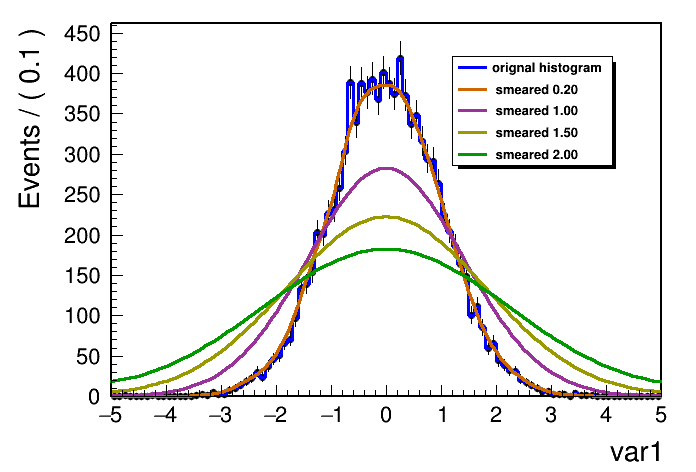

In [12]:

# canvas = rootnotes.default_canvas()
c1 = ROOT.TCanvas()
frame = var1.frame()
data.plotOn(frame)
hist_pdf.plotOn(frame, ROOT.RooFit.Name('curve_original_histogram'))
legend = ROOT.TLegend(0.65, 0.65, 0.88, 0.88)
legend.AddEntry(frame.findObject("curve_original_histogram"), "orignal histogram", "L")
for i, (color, smeared) in enumerate(zip(COLORS, all_smeared)):
    curve_name = "curve_%d" % i
    smeared.plotOn(frame, ROOT.RooFit.LineColor(color), ROOT.RooFit.Name(curve_name))
    curve = frame.findObject(curve_name)
    legend.AddEntry(curve, curve.GetTitle().replace("Projection of", ""), "L")
frame.addObject(legend)
frame.Draw()
# canvas

c1.Draw()